### Exercise 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population, e.g. select the individual $j$ with the algorithm: $j=N\times int(r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities, e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ position for every city in the path (this mutation/move does not change the fitness/path-length but could be helpful for ergodicity), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 1, 2, 3 \right] $ for a $+2$ shift
3. shift of $+n$ positions for $m$ contiguous cities (given the presence of the previous operator, you can avoid mutations that require usage of periodic boundary conditions), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
4. permutation among $m$ contiguous cities with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 3, 1, 2 \right] $ for a permutation of the first 2 cities with the last 2.
5. inversion of the order in which they appear in the path of $m$ cities ($m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bods and that you will call with probability $p^{(i)}_c > 50\%$)
Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- 30 cities randomly placed **on** a circumference
- 30 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path

Il programma scritto per risolvere questo esercizio è composto da diversi file:
- **main.cpp** date le posizioni di NCity città determina il percorso più breve per visitarle tutte una sola volta e tornare ritornando al punto di partenza. Utilizza un algoritmo genetico che genera *Npopulation* popolazioni da *Nelement* percorsi l'una. Seleziona per ogni popolazione creata il percorso migliore la cui lunghezza è salvata nel file *Best.dat* insieme alla lunghezza media della metà migliore di popolazione.
- *main.h* contiene le dichiarazioni delle funzioni e delle struct utilizzate da *main.cpp* e le definizioni dei parametri *Ncity Nelement Npopulation*.
- **CityGenerator.cpp** crea il file *CityPosition.dat* su cui salva le posizioni delle città da raggiungere lungo il percorso. Legge dal file *main.h* il valore della variabile *circle*; se è uguale a true dispone le città lungo una circonferenza.
- *random.cpp random.h* sono utilizzati per generare numeri casuali

**Per eseguire** il programma si lancia il comando *make* che compila tutti i filie utilizzati, si lancia il comando *./CityGenerator.exe* che genera il file *CityPosition.dat*, si lancia il comando *./main.exe* che esegue il resto del programma.

Di seseguito riportiamo il grafico con la lunghezza del percorso più breve e la media delle lunghezze della metà migliore della popolazione in funzione del numero di popolazioni generate:


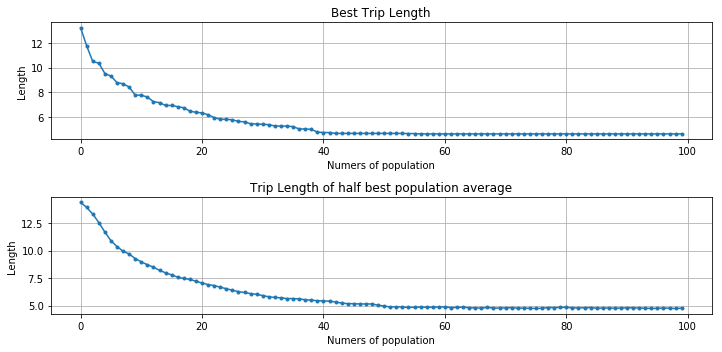

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10, 5))

npop, best, halfbest = np.loadtxt("code/Best.dat", usecols=(0,1,2), delimiter='	', unpack='true')

plt.subplot(2, 1, 1)
plt.plot(npop,best, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.title('Best Trip Length')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(npop,halfbest, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.title('Trip Length of half best population average')
plt.grid(True)

plt.tight_layout()
#plt.savefig("./pictures/BestTripsLength.png")

plt.show()

Di seguito riportiamo il miglior percorso ottenuto:

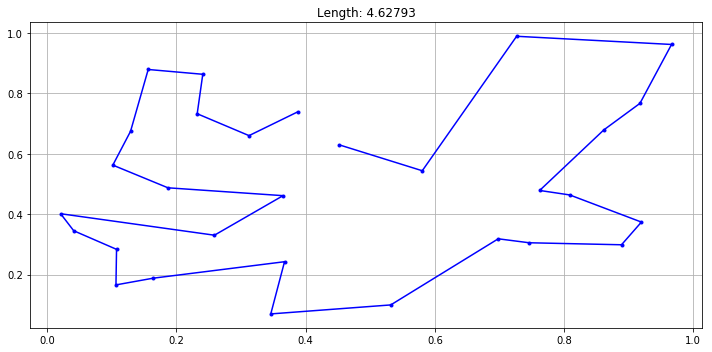

In [2]:
import string
fig=plt.figure(figsize=(10, 5))

i, x, y = np.loadtxt("code/BestTrip.dat", usecols=(0,1,2), delimiter='	', unpack='true')

title = str(np.loadtxt("code/BestLength.dat"))
plt.plot(x,y,'.-b')
plt.title('Length: '+title)
plt.grid()

plt.tight_layout()
#plt.savefig("./pictures/BestTrips.png")

plt.show()

Qui sono riportati gli stessi due precedentemente descritti ottenuti disponendo le 30 città da raggiungere lungo una circoferenza.
<img src="./pictures/BestTripsLength.png">
<img src="./pictures/BestTrips.png">